In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('task100k.csv')
df.head()

,id,name,artists,duration_ms,popularity,release_date,tempo,key,liveness
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",831667,4,1921,80.954,10,0.665
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],180533,5,1921,60.936,7,0.160
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,500062,5,1921,110.339,3,0.101
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],210000,3,1921,100.109,5,0.381
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],166693,2,1921,101.665,3,0.229


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            99999 non-null  object 
 1   name          99999 non-null  object 
 2   artists       99999 non-null  object 
 3   duration_ms   99999 non-null  int64  
 4   popularity    99999 non-null  int64  
 5   release_date  99999 non-null  object 
 6   tempo         99999 non-null  float64
 7   key           99999 non-null  int64  
 8   liveness      99999 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [11]:
print(np.percentile(df['liveness'], 99))
print(np.percentile(df['liveness'], 1))

0.8750200000000041
0.0394


In [26]:
# Only use year in release_date
df['release_date'] = df['release_date'].apply(lambda x: int(x[:4]))

In [5]:
df = df.drop(labels=['id'], axis=1)
df.shape

(99999, 8)

In [11]:
df.head()

,name,artists,duration_ms,popularity,release_date,tempo,key,liveness
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",831667,4,1921,80.954,10,0.665
1,Clancy Lowered the Boom,['Dennis Day'],180533,5,1921,60.936,7,0.160
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,500062,5,1921,110.339,3,0.101
3,Danny Boy,['Frank Parker'],210000,3,1921,100.109,5,0.381
4,When Irish Eyes Are Smiling,['Phil Regan'],166693,2,1921,101.665,3,0.229


In [6]:
numeric_columns = df.columns[df.dtypes != 'object']
string_columns = df.columns[df.dtypes == 'object']
print(f'Numeric columns: {len(numeric_columns)}, {numeric_columns}')
print(f'String columns: {len(string_columns)}, {string_columns}')

Numeric columns: 6, Index(['duration_ms', 'popularity', 'release_date', 'tempo', 'key',
       'liveness'],
      dtype='object')
String columns: 2, Index(['name', 'artists'], dtype='object')


### **Numeric Features**

#### **Plot Correlation heatmap**

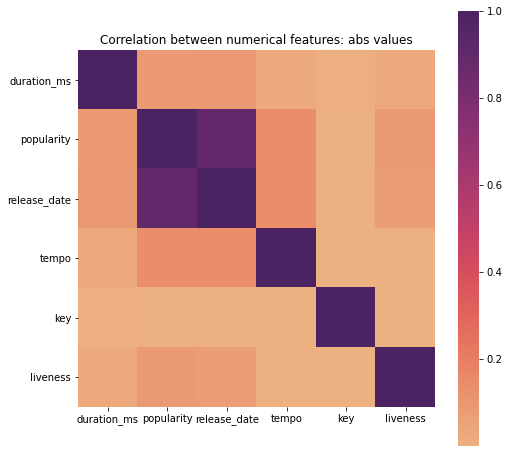

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = pd.DataFrame(data=df, columns=numeric_columns, index=df.index)
corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features: abs values')
plt.show()

#### **Pairwise relationships**

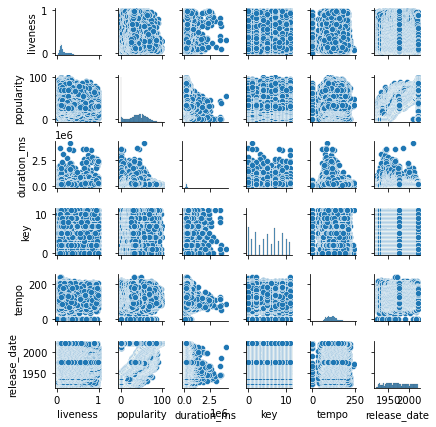

In [8]:
sns_plot = sns.pairplot(df, height=1, vars=['liveness', 'popularity', 'duration_ms', 'key', 'tempo', 'release_date'])
plt.show()

### **Categorical Features**

#### **Artists**

/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0, flags

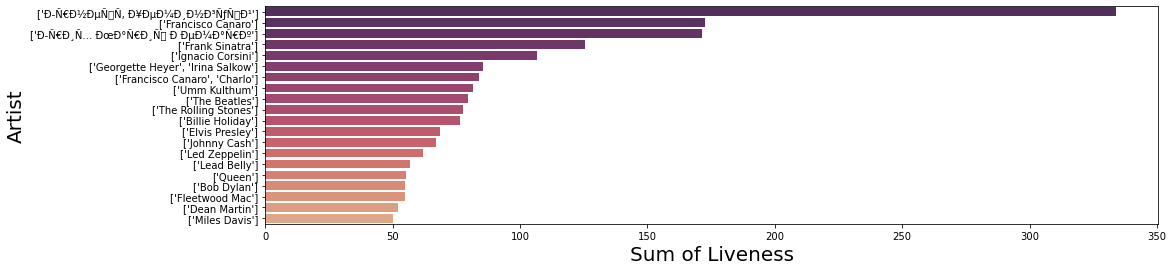

In [9]:
fig, ax = plt.subplots(figsize = (16, 4))
lead_artists = df.groupby('artists')['liveness'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="flare_r", ax=ax)
ax.set_xlabel('Sum of Liveness', fontsize=20)
ax.set_ylabel('Artist', fontsize=20)
plt.show()

#### **Name**

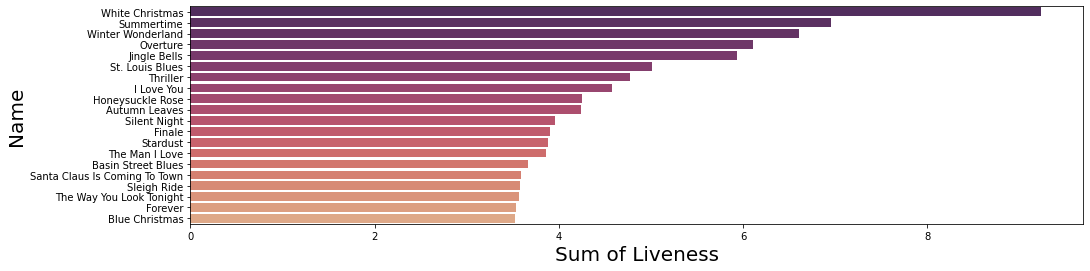

In [10]:
fig, ax = plt.subplots(figsize = (16, 4))
lead_artists = df.groupby('name')['liveness'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="flare_r", ax=ax)
ax.set_xlabel('Sum of Liveness', fontsize=20)
ax.set_ylabel('Name', fontsize=20)
plt.show()

In [14]:
# drop name
df = df.drop(labels=['name'], axis=1)

In [15]:
# artists, duration_ms, popularity, release_date, tempo, key, liveness
df.shape

(99999, 7)

In [16]:
np_data = df.to_numpy()

artists_cnt = 0
artists2num = {}
trans_artists = []

for i in range(len(np_data)):
    # process artists
    np_data[i][0] = np_data[i][0].lower().replace(' ', '').replace('[', '').replace(']', '').split(',')
    for j in range(len(np_data[i][0])):
        if np_data[i][0][j] not in artists2num:
            artists2num[np_data[i][0][j]] = artists_cnt
            artists_cnt += 1
            
        np_data[i][0][j] = artists2num[np_data[i][0][j]]
        
    #process release_date
    np_data[i][3] = 2021-np_data[i][3]
    
    # process duration_ms
    np_data[i][1] = np_data[i][1]/60000.0

In [20]:
import random

index = list(range(len(np_data)))
random.shuffle(index)

In [21]:
train_split = int(len(np_data)*0.8)
valid_split = int(len(np_data)*0.9)

train_index = index[:train_split]
valid_index = index[train_split:valid_split]
test_index = index[valid_split:]

In [22]:
train_data = np_data[train_index]
valid_data = np_data[valid_index]
test_data = np_data[test_index]

print(len(train_data))
print(len(valid_data))
print(len(test_data))

np.save('train_data', train_data)
np.save('valid_data', valid_data)
np.save('test_data', test_data)

79999
10000
10000
